In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

from feature_engine.outliers import Winsorizer

In [2]:
data = pd.read_csv('BostonHousing.csv',usecols=['rm','lstat','crim','medv'])
data.head()

,crim,rm,lstat,medv
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2


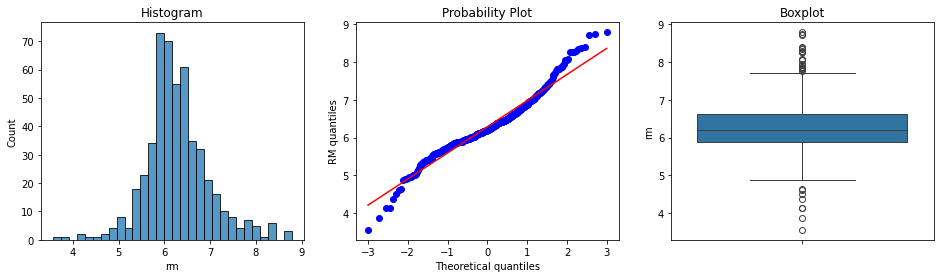

In [3]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# let's find outliers in RM

diagnostic_plots(data, 'rm')



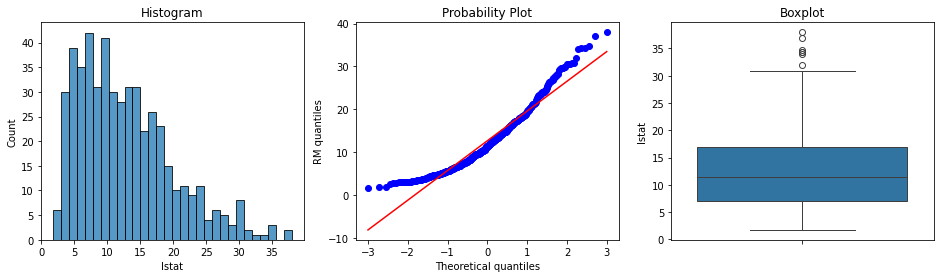

In [4]:
# visualise outliers in LSTAT

diagnostic_plots(data, 'lstat')

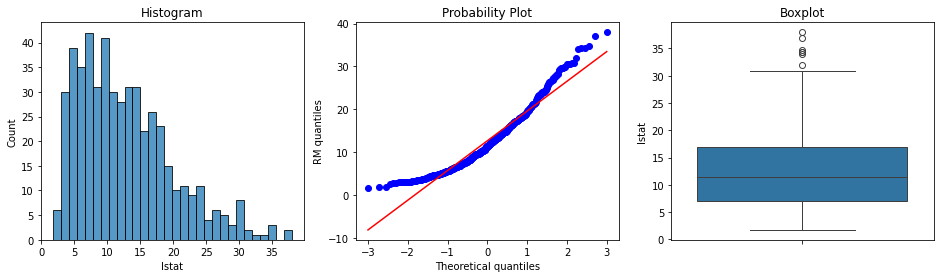

In [5]:
# visualise outliers in LSTAT

diagnostic_plots(data, 'lstat')

In [6]:
#To find the outliers, let's re-utilise the function we learned in section 3:

def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary



In [7]:


# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(data, 'rm')
RM_upper_limit, RM_lower_limit



(7.5875, 5.314)

In [8]:
# find limits for lstat
RM_upper_limit, RM_lower_limit = find_boundaries(data, 'lstat')
RM_upper_limit, RM_lower_limit



(26.8075, 3.7075)

In [9]:
# limits for CRIM
CRIM_upper_limit, CRIM_lower_limit = find_boundaries(data, 'crim')
CRIM_upper_limit, CRIM_lower_limit

(15.78915, 0.027909999999999997)

In [10]:
# Now let's replace the outliers by the maximum and minimum limit

data['rm']= np.where(data['rm'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['rm'] < RM_lower_limit, RM_lower_limit, data['rm']))


In [14]:
# Now let's replace the outliers by the maximum and minimum limit

data['lstat']= np.where(data['lstat'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['lstat'] < RM_lower_limit, RM_lower_limit, data['lstat']))


In [15]:
# Now let's replace the outliers by the maximum and minimum limit

data['crim']= np.where(data['crim'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['crim'] < RM_lower_limit, RM_lower_limit, data['crim']))


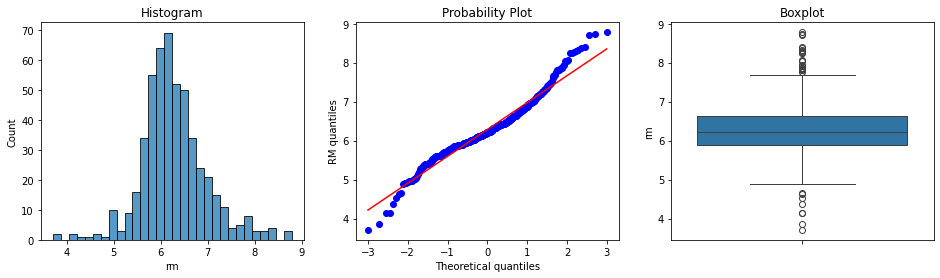

In [16]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(data, 'rm')


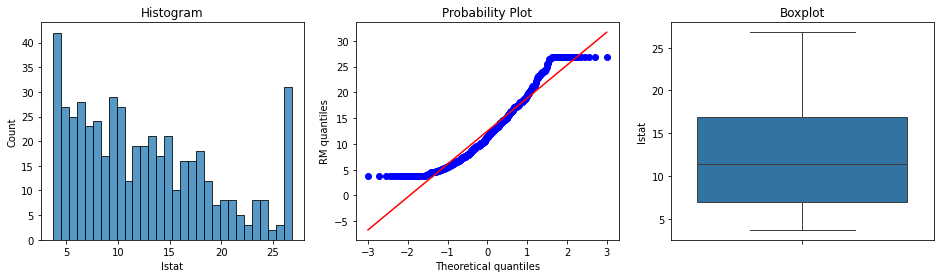

In [17]:
diagnostic_plots(data, 'lstat')

## Censoring with feature-engine

In [19]:
# create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose from iqr, gaussian or quantiles
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=['rm', 'lstat', 'crim'])

windsoriser.fit(data)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['rm', 'lstat', 'crim'])

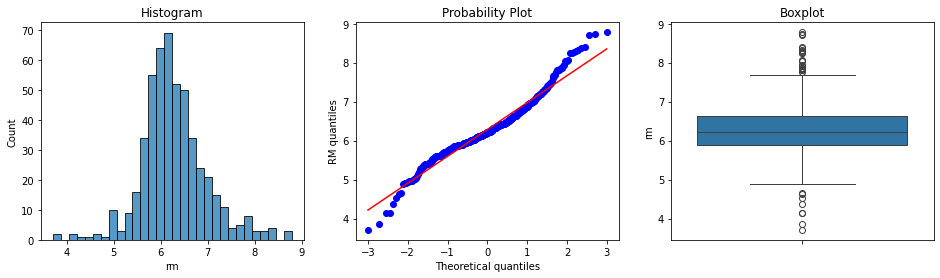

In [20]:
boston_t = windsoriser.transform(data)

diagnostic_plots(data, 'rm')



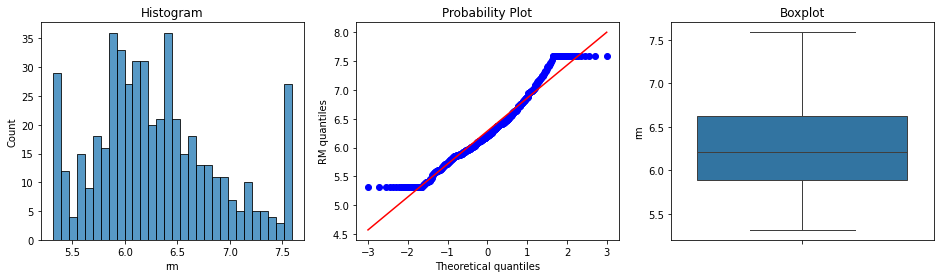

In [21]:
diagnostic_plots(boston_t, 'rm')

In [22]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_


{'rm': 5.314, 'lstat': 3.713125, 'crim': 3.7075}

In [23]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'rm': 7.5875, 'lstat': 26.798125, 'crim': 15.78915}